In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [6]:
x = [1,2,3,4,5]
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.0

3.0

3.0

In [12]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col = 'student number')
df.head()

english  mathematics
student number                      
1                    42           65
2                    69           80
3                    56           63
4                    41           63
5                    57           76

In [10]:
df.shape

(50, 2)

In [14]:
df['english'].mean()
sum(df['english'])/len(df['english'])
sp.mean(df['english'])
np.mean(df['english'])

58.38

58.380

<ipython-input-14-045210e5a26e>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.38

58.38

In [15]:
data = [2,8,3]
np.mean(data)

4.333333333333333

In [19]:
# 조화평균
data = np.array([80, 120])
1/data
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [17]:
hmean(data)

95.99999999999999

In [22]:
np.average(np.arange(1,11))
np.mean(np.arange(1,11))

5.5

5.5

In [24]:
scores = np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [25]:
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79])

In [26]:
n = len(sorted_scores)
if n %2 == 0:
    x1 = sorted_scores[n//2-1]
    x2 = sorted_scores[n//2]
    med = (x1+x2) / 2
else :
    med = sorted_scores[(n+1)//2-1]

med

57.5

In [31]:
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [32]:
np.mean(income)

1945681.4627969689

In [33]:
income = np.append(income, 10**9)
np.mean(income)

11827407.38890789

In [46]:
np.random.seed(1)
data = np.random.choice(['A','B','C'], 1000)
data[:10]

array(['B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B'], dtype='<U1')

In [47]:
pd.Series(data).value_counts()

C    337
A    334
B    329
dtype: int64

In [49]:
pd.Series(data).value_counts().index[0]

'C'

In [50]:
np.random.seed(123)
data = np.random.normal(100, 20, size=1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [54]:
sorted(data)[0], sorted(data)[-1]
data.min(),data.max()

(35.37889984161376, 171.43158436052622)

(35.37889984161376, 171.43158436052622)

In [63]:
np.quantile(data, 0.25), np.percentile(data, 25)
np.quantile(data, 0.50), np.percentile(data, 50)
np.quantile(data, 0.75), np.percentile(data, 75)
np.quantile(data, 1), np.percentile(data, 100)

(86.30886819268538, 86.30886819268538)

(99.17628889574436, 99.17628889574436)

(113.37731495435875, 113.37731495435875)

(171.43158436052622, 171.43158436052622)

{'whiskers': [<matplotlib.lines.Line2D at 0x15a46ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x15a46cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a46c730>],
 'medians': [<matplotlib.lines.Line2D at 0x15a488580>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a488850>],
 'means': []}

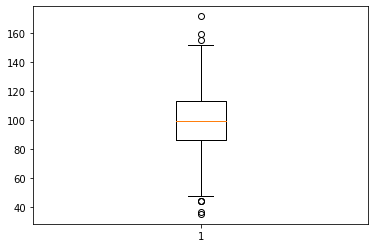

In [64]:
import matplotlib.pyplot as plt

plt.boxplot(data)

In [71]:
describe(data)
describe(df['english'],ddof=1) # 표본의 기술통계량, ddof = 0 모집단의 기술통계량

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.3167932532496243, kurtosis=-0.38870454364589113)

In [70]:
df[['english']].describe()

english
count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00